# Evaluation - Approach 1

## Phase 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Load the results from Approach 1, Phase 1

In [2]:
# Load the dataset 
file_path = r"C:\Users\iratx\OneDrive\Documents\Máster\Segundo año\Segundo semestre\TFM\resultados_nuevo\approach1_phase1_results.csv"
df = pd.read_csv(file_path, sep=",")

df.head(20)

,Case_No,Prompt,LLM,Ground Truth,Prediction
0,1,P1,GPT-4o,1,1
1,2,P1,GPT-4o,1,1
2,3,P1,GPT-4o,1,1
3,4,P1,GPT-4o,1,1
4,5,P1,GPT-4o,1,1
5,6,P1,GPT-4o,0,0
6,7,P1,GPT-4o,0,0
7,8,P1,GPT-4o,0,0
8,9,P1,GPT-4o,0,1
9,10,P1,GPT-4o,0,0


#### Compute the performance metrics

In [3]:
# List of unique prompts and LLMs
prompts = df["Prompt"].unique()
llms = df["LLM"].unique()

# Store results
metrics = []

In [4]:
# Compute metrics for each (Prompt, LLM) combination
for prompt in prompts:
    for llm in llms:
        subset = df[(df["Prompt"] == prompt) & (df["LLM"] == llm)]
        
        y_true = subset["Ground Truth"]
        y_pred = subset["Prediction"]
        
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, zero_division=0)
        rec = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        
        metrics.append([prompt, llm, acc, prec, rec, f1])

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics, columns=["Prompt", "LLM", "Accuracy", "Precision", "Recall", "F1 Score"])

# Save results to a CSV file
metrics_df.to_csv("approach1_phase1_evaluation.csv", index=False)

# Print summary
print(metrics_df)

   Prompt       LLM  Accuracy  Precision  Recall  F1 Score
0      P1    GPT-4o       0.9   0.833333     1.0  0.909091
1      P1  Claude-3       0.7   0.666667     0.8  0.727273
2      P1  Gemini-2       0.8   0.714286     1.0  0.833333
3      P1  Deepseek       0.6   0.571429     0.8  0.666667
4      P2    GPT-4o       0.8   0.714286     1.0  0.833333
5      P2  Claude-3       0.4   0.444444     0.8  0.571429
6      P2  Gemini-2       0.6   0.555556     1.0  0.714286
7      P2  Deepseek       0.7   0.625000     1.0  0.769231
8      P3    GPT-4o       0.8   0.714286     1.0  0.833333
9      P3  Claude-3       0.6   0.555556     1.0  0.714286
10     P3  Gemini-2       0.6   0.555556     1.0  0.714286
11     P3  Deepseek       0.6   0.555556     1.0  0.714286
12     P4    GPT-4o       0.9   1.000000     0.8  0.888889
13     P4  Claude-3       0.8   0.800000     0.8  0.800000
14     P4  Gemini-2       0.8   0.714286     1.0  0.833333
15     P4  Deepseek       0.9   1.000000     0.8  0.8888

#### Visualization of the results

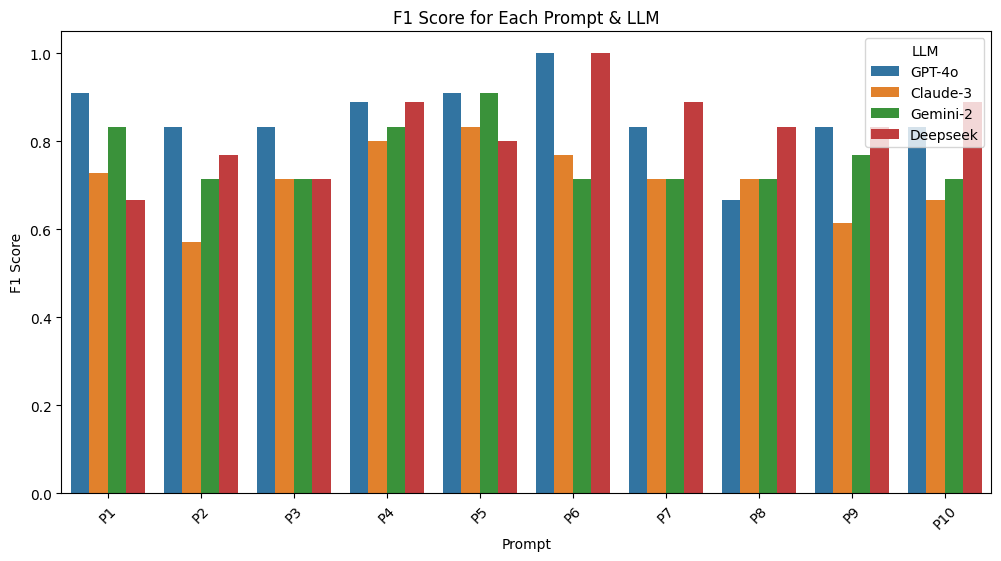

In [5]:
# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df, x="Prompt", y="F1 Score", hue="LLM")
plt.xticks(rotation=45)
plt.title("F1 Score for Each Prompt & LLM")
plt.legend(title="LLM")
plt.show()

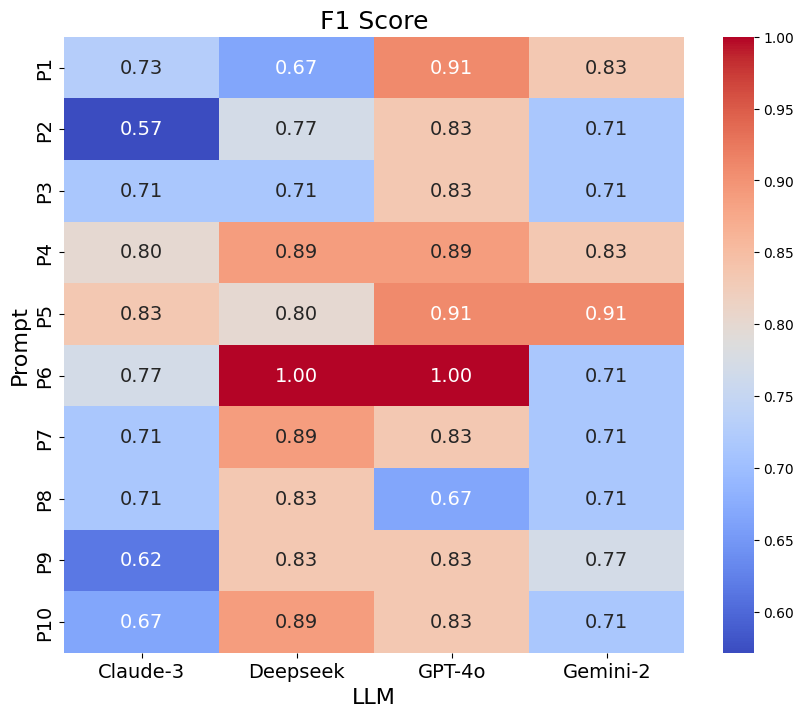

In [6]:
# Convert Prompt column to a categorical type with correct numerical ordering
metrics_df["Prompt"] = pd.Categorical(metrics_df["Prompt"], 
                                      categories=sorted(metrics_df["Prompt"].unique(), 
                                                        key=lambda x: int(x[1:])), 
                                      ordered=True)

# Re-sort DataFrame based on the new categorical order
metrics_df = metrics_df.sort_values("Prompt")

# Create the heatmap again
pivot_df = metrics_df.pivot(index="Prompt", columns="LLM", values="F1 Score")

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 14})  # Increase annotation size

# Increase font size for labels and title
plt.title("F1 Score", fontsize=18)
plt.xlabel("LLM", fontsize=16)
plt.ylabel("Prompt", fontsize=16)

# Adjust tick parameters for better visibility
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

C:\Users\iratx\AppData\Local\Temp\ipykernel_20308\2952688704.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prompt_means = df.groupby("Prompt")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
C:\Users\iratx\AppData\Local\Temp\ipykernel_20308\2952688704.py:27: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(data=df, x="Prompt", y=metric, hue="LLM", ax=ax, palette=colorblind_palette)
C:\Users\iratx\AppData\Local\Temp\ipykernel_20308\2952688704.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\iratx\AppData\Local\Temp\ipykernel_20308\2952688704.py:27: UserWarning: The palette lis

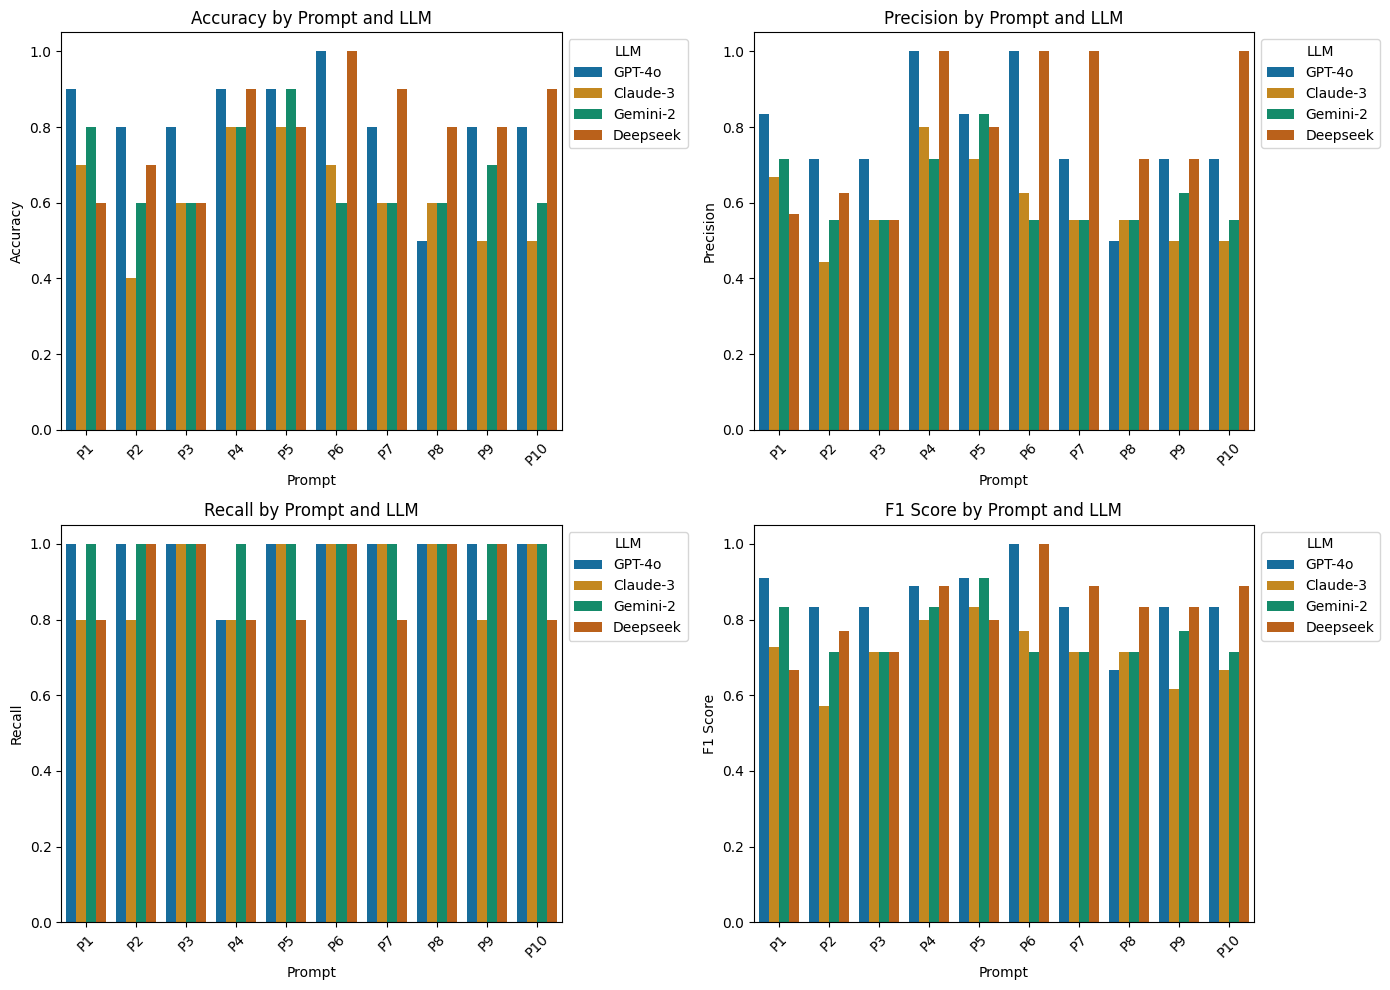

Mean scores per LLM:
           Accuracy  Precision  Recall  F1 Score
LLM                                            
Claude-3      0.62   0.591706    0.92  0.712617
Deepseek      0.80   0.798056    0.90  0.828352
GPT-4o        0.82   0.773810    0.98  0.854040
Gemini-2      0.68   0.622024    1.00  0.763070

Mean scores per Prompt:
         Accuracy  Precision  Recall  F1 Score
Prompt                                       
P1         0.750   0.696429    0.90  0.784091
P2         0.625   0.584821    0.95  0.722070
P3         0.650   0.595238    1.00  0.744048
P4         0.850   0.878571    0.85  0.852778
P5         0.850   0.795238    0.95  0.862879
P6         0.825   0.795139    1.00  0.870879
P7         0.725   0.706349    0.95  0.787698
P8         0.625   0.581349    1.00  0.732143
P9         0.700   0.638393    0.95  0.762821
P10        0.700   0.692460    0.95  0.775794


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "approach1_phase1_evaluation.csv"
df = pd.read_csv(file_path)

# Ensure the 'Prompt' column is sorted numerically
df["Prompt"] = pd.Categorical(df["Prompt"], 
                              categories=sorted(df["Prompt"].unique(), key=lambda x: int(x[1:])), 
                              ordered=True)

# Compute mean scores per LLM
llm_means = df.groupby("LLM")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()

# Compute mean scores per Prompt (and sort it correctly)
prompt_means = df.groupby("Prompt")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
prompt_means = prompt_means.sort_index()  # Ensures P10 comes after P9

# Visualization: 2x2 bar plot grid with colorblind-friendly palette
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
colorblind_palette = sns.color_palette("colorblind")  # Colorblind-friendly colors

for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(data=df, x="Prompt", y=metric, hue="LLM", ax=ax, palette=colorblind_palette)
    ax.set_title(f"{metric} by Prompt and LLM")
    ax.set_xlabel("Prompt")
    ax.set_ylabel(metric)
    ax.legend(title="LLM", bbox_to_anchor=(1, 1))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Display mean scores for insights
print("Mean scores per LLM:\n", llm_means)
print("\nMean scores per Prompt:\n", prompt_means)

## Phase 2

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Load the results from Approach 2, Phase 2

In [9]:
# Load the dataset 
file_path = r"C:\Users\iratx\OneDrive\Documents\Máster\Segundo año\Segundo semestre\TFM\resultados_nuevo\approach1_phase2_results.csv"
df = pd.read_csv(file_path, sep=",")

df.head(20)

,Case_No,Prompt,LLM,Ground Truth,Prediction
0,1,P1,GPT-4o,1,1
1,2,P1,GPT-4o,1,1
2,3,P1,GPT-4o,1,1
3,4,P1,GPT-4o,1,1
4,5,P1,GPT-4o,1,1
5,6,P1,GPT-4o,0,0
6,7,P1,GPT-4o,0,0
7,8,P1,GPT-4o,0,0
8,9,P1,GPT-4o,0,0
9,10,P1,GPT-4o,0,0


#### Compute the performance metrics

In [10]:
# List of unique prompts and LLMs
prompts = df["Prompt"].unique()
llms = df["LLM"].unique()

# Store results
metrics = []

In [11]:
# Compute metrics for each (Prompt, LLM) combination
for prompt in prompts:
    for llm in llms:
        subset = df[(df["Prompt"] == prompt) & (df["LLM"] == llm)]
        
        y_true = subset["Ground Truth"]
        y_pred = subset["Prediction"]
        
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, zero_division=0)
        rec = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        
        metrics.append([prompt, llm, acc, prec, rec, f1])

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics, columns=["Prompt", "LLM", "Accuracy", "Precision", "Recall", "F1 Score"])

# Save results to a CSV file
metrics_df.to_csv("approach1_phase2_evaluation.csv", index=False)

# Print summary
print(metrics_df)

  Prompt       LLM  Accuracy  Precision    Recall  F1 Score
0     P1    GPT-4o  0.933333   0.882353  1.000000  0.937500
1     P1  DeepSeek  0.700000   0.625000  1.000000  0.769231
2     P4    GPT-4o  0.800000   0.846154  0.733333  0.785714
3     P4  DeepSeek  0.800000   0.764706  0.866667  0.812500
4     P5    GPT-4o  0.800000   0.800000  0.800000  0.800000
5     P5  DeepSeek  0.800000   0.736842  0.933333  0.823529
6     P6    GPT-4o  0.733333   0.733333  0.733333  0.733333
7     P6  DeepSeek  0.833333   0.750000  1.000000  0.857143


#### Visualization of the results

C:\Users\iratx\AppData\Local\Temp\ipykernel_20308\3778424159.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prompt_means = df.groupby("Prompt")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
C:\Users\iratx\AppData\Local\Temp\ipykernel_20308\3778424159.py:30: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.barplot(data=df, x="Prompt", y=metric, hue="LLM", ax=ax, palette=colorblind_palette, edgecolor='none')  # Remove borders
C:\Users\iratx\AppData\Local\Temp\ipykernel_20308\3778424159.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=14)
C:\Users\iratx\AppData\Local\Temp\ipykernel_2030

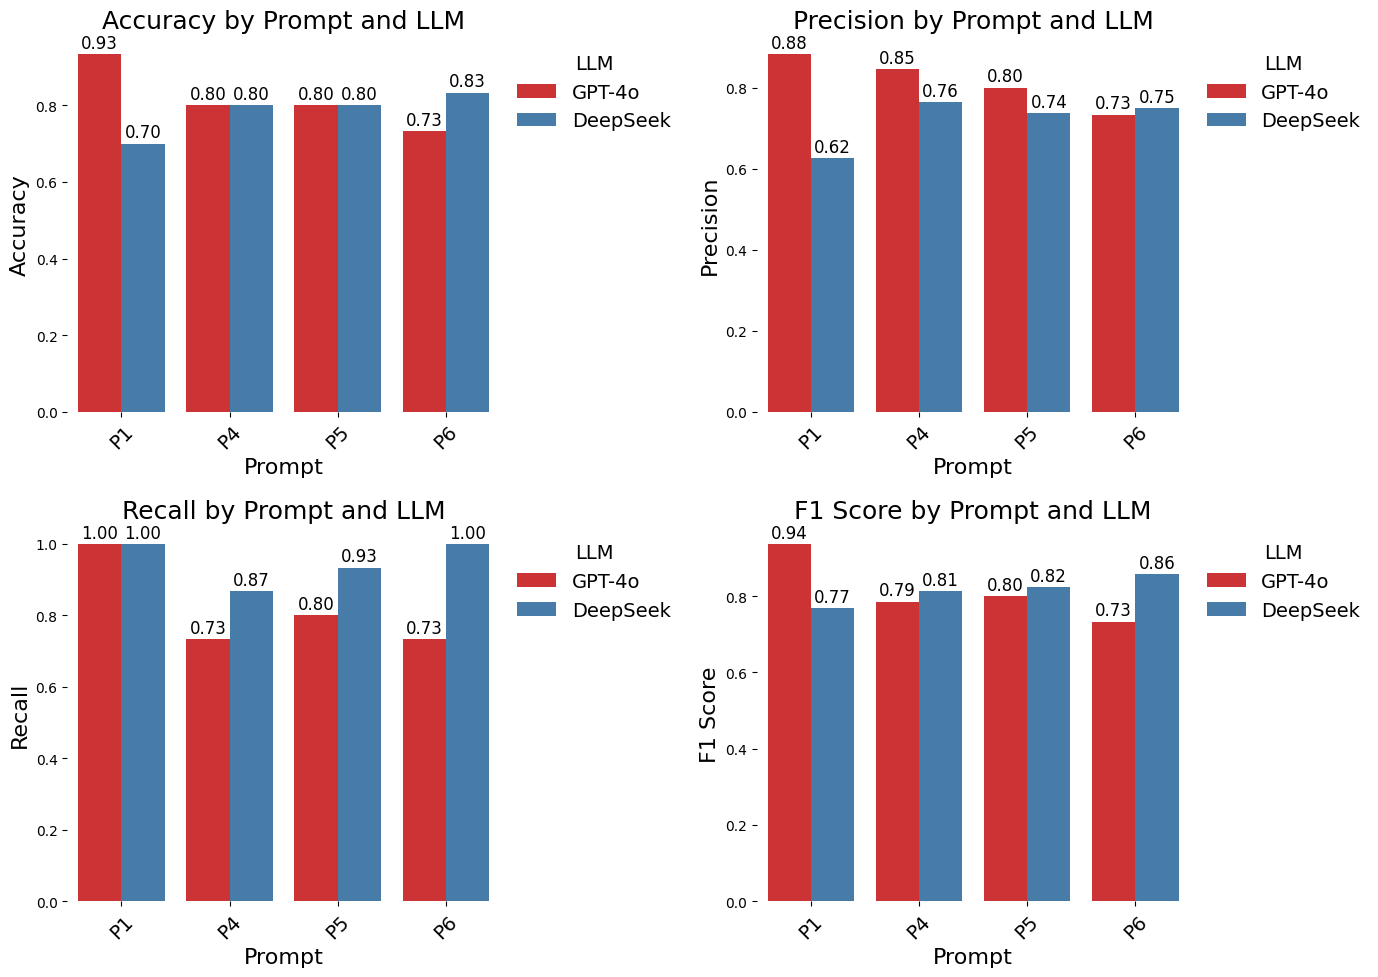

Mean scores per LLM:
           Accuracy  Precision    Recall  F1 Score
LLM                                              
DeepSeek  0.783333   0.719137  0.950000  0.815601
GPT-4o    0.816667   0.815460  0.816667  0.814137

Mean scores per Prompt:
         Accuracy  Precision    Recall  F1 Score
Prompt                                         
P1      0.816667   0.753676  1.000000  0.853365
P4      0.800000   0.805430  0.800000  0.799107
P5      0.800000   0.768421  0.866667  0.811765
P6      0.783333   0.741667  0.866667  0.795238


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "approach1_phase2_evaluation.csv"
df = pd.read_csv(file_path)

# Ensure the 'Prompt' column is sorted numerically
df["Prompt"] = pd.Categorical(df["Prompt"], 
                              categories=sorted(df["Prompt"].unique(), key=lambda x: int(x[1:])), 
                              ordered=True)

# Compute mean scores per LLM
llm_means = df.groupby("LLM")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()

# Compute mean scores per Prompt (and sort it correctly)
prompt_means = df.groupby("Prompt")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
prompt_means = prompt_means.sort_index()  # Ensures P10 comes after P9

# Visualization: 2x2 bar plot grid with colorblind-friendly palette
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
colorblind_palette = sns.color_palette("Set1")  # Colorblind-friendly colors

# Set font size for all texts
plt.rcParams.update({'font.size': 14})

for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(data=df, x="Prompt", y=metric, hue="LLM", ax=ax, palette=colorblind_palette, edgecolor='none')  # Remove borders
    ax.set_title(f"{metric} by Prompt and LLM", fontsize=18)
    ax.set_xlabel("Prompt", fontsize=16)
    ax.set_ylabel(metric, fontsize=16)
    ax.legend(title="LLM", bbox_to_anchor=(1, 1), fontsize=14, frameon=False)  # Remove legend frame
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=14)

    # Add values on top of each bar, excluding zero values
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only annotate bars with non-zero height
            ax.annotate(f'{height:.2f}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='center', 
                        fontsize=12, color='black', 
                        xytext=(0, 8), textcoords='offset points')

# Remove the borders around the plot area
for ax in axes.flatten():
    for sp in ax.spines.values():
        sp.set_visible(False)

plt.tight_layout()
plt.show()

# Display mean scores for insights
print("Mean scores per LLM:\n", llm_means)
print("\nMean scores per Prompt:\n", prompt_means)

## Phase 2 - Benchmarking

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

#### Load the results from Approach 1, benchmarking

In [14]:
# Load the dataset 
file_path = r"C:\Users\iratx\OneDrive\Documents\Máster\Segundo año\Segundo semestre\TFM\resultados_nuevo\approach1_benchmarking_results.csv"
df = pd.read_csv(file_path, sep=",")

df.head(20)

,Case_No,Prompt,LLM,Ground Truth,Prediction
0,31,P1,GPT-4o,1,1
1,32,P1,GPT-4o,1,1
2,33,P1,GPT-4o,1,1
3,34,P1,GPT-4o,1,1
4,35,P1,GPT-4o,1,1
5,36,P1,GPT-4o,1,1
6,37,P1,GPT-4o,1,1
7,38,P1,GPT-4o,0,0
8,39,P1,GPT-4o,0,0
9,40,P1,GPT-4o,0,0


#### Compute the performance metrics

In [15]:
# List of unique prompts and LLMs
prompts = df["Prompt"].unique()
llms = df["LLM"].unique()

# Store results
metrics = []

In [16]:
# Compute **weighted** metrics for each (Prompt, LLM) combination
for prompt in prompts:
    for llm in llms:
        subset = df[(df["Prompt"] == prompt) & (df["LLM"] == llm)]
        
        y_true = subset["Ground Truth"]
        y_pred = subset["Prediction"]
        
        acc = accuracy_score(y_true, y_pred)
        prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted", zero_division=0)
        
        metrics.append([prompt, llm, acc, prec, rec, f1])

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics, columns=["Prompt", "LLM", "Accuracy", "Precision", "Recall", "F1 Score"])

# Save results to a CSV file
metrics_df.to_csv("approach1_benchmark_evaluation.csv", index=False)

# Print summary
print(metrics_df)

  Prompt       LLM  Accuracy  Precision  Recall  F1 Score
0     P1    GPT-4o       1.0     1.0000     1.0  1.000000
1     P1  Deepseek       0.9     0.9125     0.9  0.893333
2     P4    GPT-4o       0.9     0.9125     0.9  0.893333
3     P4  Deepseek       0.9     0.9125     0.9  0.893333
4     P5    GPT-4o       0.9     0.9125     0.9  0.893333
5     P5  Deepseek       1.0     1.0000     1.0  1.000000
6     P6    GPT-4o       0.9     0.9125     0.9  0.893333
7     P6  Deepseek       0.9     0.9125     0.9  0.893333


#### Carry out statistical testing

In [17]:
# Carry out Shapiro-Wilk test for normality

import numpy as np
from scipy.stats import shapiro
import pandas as pd

# Define the metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Benchmark case scores
benchmark_scores = {
    "Accuracy": [1.0, 0.9, 0.9, 0.9, 0.9, 1.0, 0.9, 0.9],
    "Precision": [1.0000, 0.9125, 0.9125, 0.9125, 0.9125, 1.0000, 0.9125, 0.9125],
    "Recall": [1.0, 0.9, 0.9, 0.9, 0.9, 1.0, 0.9, 0.9],
    "F1 Score": [1.0000, 0.893333, 0.893333, 0.893333, 0.893333, 1.0000, 0.893333, 0.893333],
}

# Pathway-based case scores
pathway_scores = {
    "Accuracy": [0.933333, 0.7, 0.8, 0.8, 0.8, 0.8, 0.733333, 0.833333],
    "Precision": [0.882353, 0.625, 0.846154, 0.764706, 0.8, 0.736842, 0.733333, 0.75],
    "Recall": [1.0, 1.0, 0.733333, 0.866667, 0.8, 0.933333, 0.733333, 1.0],
    "F1 Score": [0.9375, 0.769231, 0.785714, 0.8125, 0.8, 0.823529, 0.733333, 0.857143],
}

# Loop over each metric and check normality using the Shapiro-Wilk test
for metric in metrics:
    benchmark_vals = benchmark_scores[metric]
    pathway_vals = pathway_scores[metric]

    # Combine both benchmark and pathway values for Shapiro Test
    combined_vals = benchmark_vals + pathway_vals

    # Perform Shapiro-Wilk Test for normality
    if len(combined_vals) > 3:  # Shapiro-Wilk test requires at least 3 data points
        stat, p_value = shapiro(combined_vals)
        print(f"Shapiro-Wilk Test for Metric: {metric}")
        print(f"Test Statistic: {stat}, P-value: {p_value}")
        if p_value > 0.05:
            print("The data is normally distributed.\n")
        else:
            print("The data is not normally distributed.\n")

Shapiro-Wilk Test for Metric: Accuracy
Test Statistic: 0.9294488576216248, P-value: 0.23893312695311247
The data is normally distributed.

Shapiro-Wilk Test for Metric: Precision
Test Statistic: 0.9164195199361994, P-value: 0.1477003579530256
The data is normally distributed.

Shapiro-Wilk Test for Metric: Recall
Test Statistic: 0.8533715489145409, P-value: 0.01527887578525156
The data is not normally distributed.

Shapiro-Wilk Test for Metric: F1 Score
Test Statistic: 0.942695400917914, P-value: 0.38335138503247385
The data is normally distributed.



In [18]:
# Carry out Mann-Whitney U test for statistical significance

import numpy as np
from scipy.stats import mannwhitneyu
import pandas as pd

# Define the metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Benchmark case scores
benchmark_scores = {
    "Accuracy": [1.0, 0.9, 0.9, 0.9, 0.9, 1.0, 0.9, 0.9],
    "Precision": [1.0000, 0.9125, 0.9125, 0.9125, 0.9125, 1.0000, 0.9125, 0.9125],
    "Recall": [1.0, 0.9, 0.9, 0.9, 0.9, 1.0, 0.9, 0.9],
    "F1 Score": [1.0000, 0.893333, 0.893333, 0.893333, 0.893333, 1.0000, 0.893333, 0.893333],
}

# Pathway-based case scores
pathway_scores = {
    "Accuracy": [0.933333, 0.7, 0.8, 0.8, 0.8, 0.8, 0.733333, 0.833333],
    "Precision": [0.882353, 0.625, 0.846154, 0.764706, 0.8, 0.736842, 0.733333, 0.75],
    "Recall": [1.0, 1.0, 0.733333, 0.866667, 0.8, 0.933333, 0.733333, 1.0],
    "F1 Score": [0.9375, 0.769231, 0.785714, 0.8125, 0.8, 0.823529, 0.733333, 0.857143],
}

# Initialize results list
mannwhitney_results = []

# Loop over each metric and perform the Mann-Whitney U test
for metric in metrics:
    benchmark_vals = benchmark_scores[metric]
    pathway_vals = pathway_scores[metric]

    # Ensure there are enough data points for the test
    if len(benchmark_vals) > 1 and len(pathway_vals) > 1:
        # Perform Mann-Whitney U test for unpaired data
        stat, p_value = mannwhitneyu(benchmark_vals, pathway_vals, alternative='two-sided')

        # Store the results
        mannwhitney_results.append({
            "Metric": metric,
            "Test Statistic": stat,
            "P-Value": p_value,
            "Significant": "Yes" if p_value < 0.05 else "No"
        })

# Convert results to DataFrame and display
df_mannwhitney = pd.DataFrame(mannwhitney_results)

# Show results
print(df_mannwhitney)

      Metric  Test Statistic   P-Value Significant
0   Accuracy            58.0  0.005546         Yes
1  Precision            64.0  0.000675         Yes
2     Recall            37.0  0.621769          No
3   F1 Score            58.0  0.005926         Yes


#### Visualization of the results

C:\Users\iratx\AppData\Local\Temp\ipykernel_20308\761404096.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prompt_means = df.groupby("Prompt")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
C:\Users\iratx\AppData\Local\Temp\ipykernel_20308\761404096.py:27: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=df, x="Prompt", y=metric, hue="LLM", ax=ax, palette=colorblind_palette)
C:\Users\iratx\AppData\Local\Temp\ipykernel_20308\761404096.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\iratx\AppData\Local\Temp\ipykernel_20308\761404096.py:27: UserWarning: The palette list ha

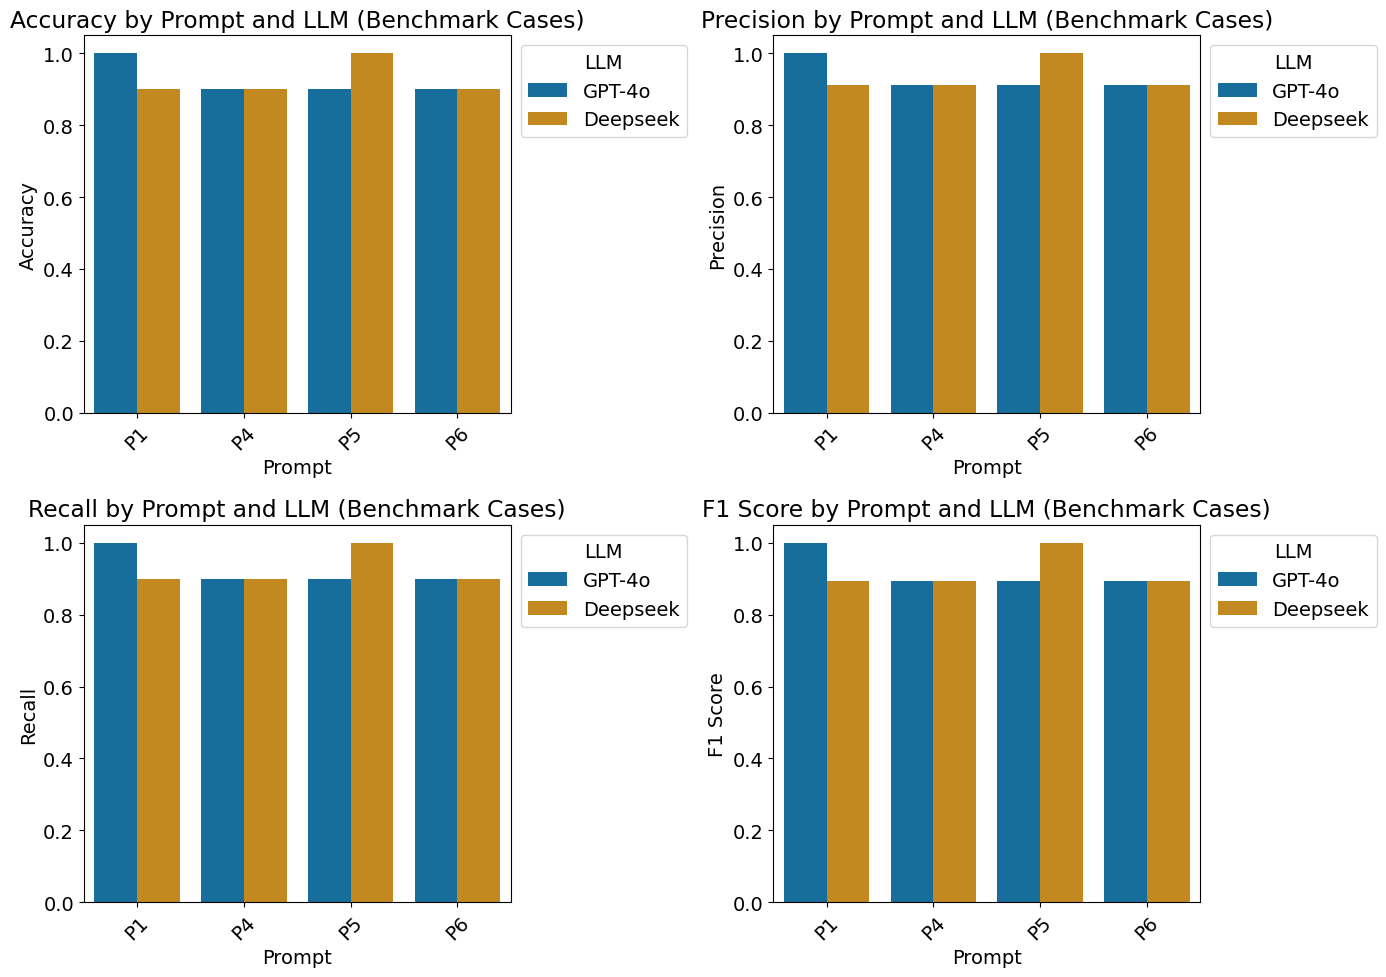

Mean scores per LLM (Benchmark Cases):
           Accuracy  Precision  Recall  F1 Score
LLM                                            
Deepseek     0.925   0.934375   0.925      0.92
GPT-4o       0.925   0.934375   0.925      0.92

Mean scores per Prompt (Benchmark Cases):
         Accuracy  Precision  Recall  F1 Score
Prompt                                       
P1          0.95    0.95625    0.95  0.946667
P4          0.90    0.91250    0.90  0.893333
P5          0.95    0.95625    0.95  0.946667
P6          0.90    0.91250    0.90  0.893333


In [19]:
# --- VISUALIZATION ---
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "approach1_benchmark_evaluation.csv"
df = pd.read_csv(file_path)

# Ensure the 'Prompt' column is sorted numerically
df["Prompt"] = pd.Categorical(df["Prompt"], 
                              categories=sorted(df["Prompt"].unique(), key=lambda x: int(x[1:])), 
                              ordered=True)

# Compute mean scores per LLM
llm_means = df.groupby("LLM")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()

# Compute mean scores per Prompt (and sort it correctly)
prompt_means = df.groupby("Prompt")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
prompt_means = prompt_means.sort_index()  # Ensures P10 appears correctly after P9

# Visualization: 2x2 bar plot grid with colorblind-friendly palette
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
colorblind_palette = sns.color_palette("colorblind")  # Colorblind-friendly colors

for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(data=df, x="Prompt", y=metric, hue="LLM", ax=ax, palette=colorblind_palette)
    ax.set_title(f"{metric} by Prompt and LLM (Benchmark Cases)")
    ax.set_xlabel("Prompt")
    ax.set_ylabel(metric)
    ax.legend(title="LLM", bbox_to_anchor=(1, 1))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Display mean scores for insights
print("Mean scores per LLM (Benchmark Cases):\n", llm_means)
print("\nMean scores per Prompt (Benchmark Cases):\n", prompt_means)